In [99]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
import cv2
import mediapipe as mp
import numpy as np
import os
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
csv_path = 'pose_measures.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_path)

In [6]:
df.columns

Index(['angle_right_shoulder_hip_knee', 'angle_right_hip_knee_ankle',
       'angle_left_shoulder_hip_knee', 'angle_left_hip_knee_ankle',
       'angle_right_elbow_shoulder_hip', 'angle_left_elbow_shoulder_hip',
       'angle_right_wrist_elbow_shoulder', 'angle_left_wrist_elbow_shoulder',
       'ndright_shoulder', 'aright_shoulder', 'ndright_elbow', 'aright_elbow',
       'ndright_wrist', 'aright_wrist', 'ndright_hip', 'aright_hip',
       'ndright_knee', 'aright_knee', 'ndright_ankle', 'aright_ankle',
       'ndleft_shoulder', 'aleft_shoulder', 'ndleft_elbow', 'aleft_elbow',
       'ndleft_wrist', 'aleft_wrist', 'ndleft_hip', 'aleft_hip', 'ndleft_knee',
       'aleft_knee', 'ndleft_ankle', 'aleft_ankle', 'pose'],
      dtype='object')

In [58]:

# Define the pose classes
poses = {
    0: 'no_pose',
    1: 'tree',
    2: 'chair',
    3: 'cobra',
    4: 'shoulder_stand',
    5: 'warrior',
    6: 'triangle',
}




In [72]:
# Split the data into features (X) and labels (y)
X = df.drop('pose', axis=1)  # Features
y = df['pose']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the TensorFlow model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
#     layers.Dropout(0.3),
    layers.Dense(len(poses), activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 128)               4224      
                                                                 
 dense_87 (Dense)            (None, 128)               16512     
                                                                 
 dense_88 (Dense)            (None, 64)                8256      
                                                                 
 dense_89 (Dense)            (None, 32)                2080      
                                                                 
 dense_90 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_15 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                     

In [73]:
# Train the model
history=model.fit(X_train, y_train, epochs=35, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/35
39/39 [==============================] - 1s 5ms/step - loss: 1.2667 - accuracy: 0.5532 - val_loss: 0.7769 - val_accuracy: 0.7097
Epoch 2/35
39/39 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.7798 - val_loss: 0.4287 - val_accuracy: 0.8548
Epoch 3/35
39/39 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8661 - val_loss: 0.3579 - val_accuracy: 0.9032
Epoch 4/35
39/39 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8847 - val_loss: 0.5288 - val_accuracy: 0.8194
Epoch 5/35
39/39 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8815 - val_loss: 0.3290 - val_accuracy: 0.8871
Epoch 6/35
39/39 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9177 - val_loss: 0.4080 - val_accuracy: 0.8581
Epoch 7/35
39/39 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9403 - val_loss: 0.2082 - val_accuracy: 0.9387
Epoch 8/35
39/39 [==

In [93]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Save the model


10/10 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9774
Test Accuracy: 0.977419376373291


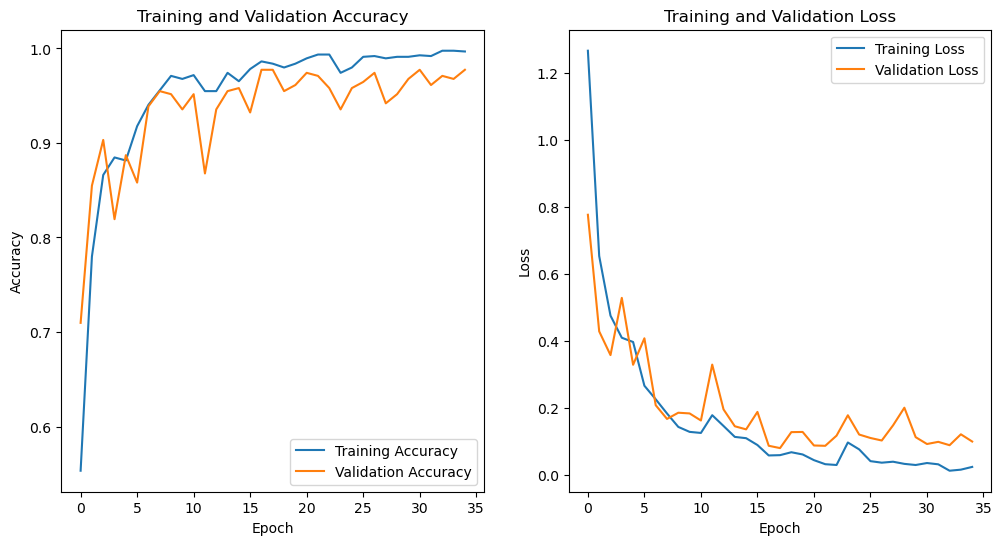

In [75]:
import matplotlib.pyplot as plt

# Train the model and get the training history
# history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [76]:
model.save('pose_classification_model.h5')

C:\Users\kingr\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
model.save('pose_classification_model_keras.keras')

In [91]:
modal.predict(X_test.iloc[0, :])


NameError: name 'modal' is not defined

In [87]:
X_test.loc[X_test.index[0], X_test.columns[0]]

153.5

In [98]:
# Reshape the input to match the model's expected shape
input_sample = X_test.iloc[1, :].values.reshape(1, -1)

# Predict using the reshaped input
model.predict(input_sample)


1/1 [==============================] - 0s 16ms/step


array([[2.4567093e-04, 3.3331220e-05, 1.6805885e-04, 4.3716253e-04,
        9.9737716e-01, 1.7172756e-03, 2.1391568e-05]], dtype=float32)

In [97]:
y_test

1519    6.0
1441    4.0
351     1.0
352     1.0
578     5.0
       ... 
58      1.0
342     1.0
394     1.0
453     5.0
843     2.0
Name: pose, Length: 310, dtype: float64

In [101]:
def find_center(keypoints):
    # Calculate the center by taking the average of x and y coordinates
    center_x = np.mean([x for x, y in keypoints])
    center_y = np.mean([y for x, y in keypoints])
    return center_x, center_y

def normalize_distances(distances):
    max_distance = max(distances)
    min_distance = min(distances)
    
    if max_distance == min_distance:
        # Avoid division by zero if all distances are the same
        return [0.0] * len(distances)
    
    return [round((distance - min_distance) / (max_distance - min_distance) , 2) for distance in distances]



def calculate_distances_and_angles(keypoints, center):
    distances = []
    angles = []

    for x, y in keypoints:
        # Calculate Euclidean distance from the center
        distance = np.linalg.norm(np.array([x, y]) - np.array(center))
        distances.append(distance)

        # Calculate angle relative to the center (you may need to adjust this)
        angle = (np.arctan2(y - center[1], x - center[0]) * 180.0 / np.pi + 360) % 360
        angles.append(round(angle,1))
    
    normalized_distances = normalize_distances(distances)
    
    return normalized_distances, angles

In [103]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
#     if angle >180.0:
#         angle = 360-angle
    
    # Round to 1 decimal place
    angle = round(angle, 1)
    
        
    return angle 

In [116]:

# Load image
image_path = "YogaIntelliJ/classification model/yoga_poses/test/tree/guy3_tree085.jpg"
ori_image = cv2.imread(image_path)

# Resize image to 640x480
desired_size = (640, 480)
image = cv2.resize(ori_image, desired_size)


def PoseDetection(image):

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # Recolor image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Make detection
        results = pose.process(image_rgb)

    # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
        
        # Extract key landmarks for angle calculation
            nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,
                landmarks[mp_pose.PoseLandmark.NOSE.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                     landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,
                       landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                    landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            keypoints = [
                right_shoulder, right_elbow, right_wrist, right_hip, right_knee, right_ankle,
                left_shoulder, left_elbow, left_wrist, left_hip, left_knee, left_ankle
            ]

            center = nose
            normalized_distance, angles_from_center = calculate_distances_and_angles(keypoints, center)

            angle_right_shoulder_hip_knee = calculate_angle(right_shoulder, right_hip, right_knee)
            angle_right_hip_knee_ankle = calculate_angle(right_hip, right_knee, right_ankle)
            angle_left_shoulder_hip_knee = calculate_angle(left_shoulder, left_hip, left_knee)
            angle_left_hip_knee_ankle = calculate_angle(left_hip, left_knee, left_ankle)

            angle_right_elbow_shoulder_hip = calculate_angle(right_elbow, right_shoulder, right_hip)
            angle_left_elbow_shoulder_hip = calculate_angle(left_elbow, left_shoulder, left_hip)

            angle_right_wrist_elbow_shoulder = calculate_angle(right_wrist, right_elbow, right_shoulder)
            angle_left_wrist_elbow_shoulder = calculate_angle(left_wrist, left_elbow, left_shoulder)

        
        # Draw landmarks and connections on the image
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2),
                                   mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
                                   )
        
            cv2.putText(image, str(angle_left_wrist_elbow_shoulder) + " , " + str(
            round(normalized_distance[7], 2)) + " , " + str(
            round(angles_from_center[7], 2)),
                    tuple(np.multiply(left_elbow, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, str(angle_right_wrist_elbow_shoulder) + " , " + str(
            round(normalized_distance[1], 2)) + " , " + str(
            round(angles_from_center[1], 2)),
                    tuple(np.multiply(right_elbow, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, str(angle_right_shoulder_hip_knee) + " , " + str(
            round(normalized_distance[3], 2)) + " , " + str(
            round(angles_from_center[3], 2)),
                    tuple(np.multiply(right_hip, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, str(angle_left_shoulder_hip_knee) + " , " + str(
            round(normalized_distance[9], 2)) + " , " + str(
            round(angles_from_center[9], 2)),
                    tuple(np.multiply(left_hip, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, str(angle_right_hip_knee_ankle) + " , " + str(
            round(normalized_distance[4], 2)) + " , " + str(
            round(angles_from_center[4], 2)),
                    tuple(np.multiply(right_knee, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, str(angle_left_hip_knee_ankle) + " , " + str(
            round(normalized_distance[10], 2)) + " , " + str(
            round(angles_from_center[10], 2)),
                    tuple(np.multiply(left_knee, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, str(angle_right_elbow_shoulder_hip) + " , " + str(
            round(normalized_distance[0], 2)) + " , " + str(
            round(angles_from_center[0], 2)),
                    tuple(np.multiply(right_shoulder, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, str(angle_left_elbow_shoulder_hip) + " , " + str(
            round(normalized_distance[6], 2)) + " , " + str(
            round(angles_from_center[6], 2)),
                    tuple(np.multiply(left_shoulder, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, " , " + str(round(normalized_distance[2], 2)) + " , " + str(
            round(angles_from_center[2], 2)),
                    tuple(np.multiply(right_wrist, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, " , " + str(round(normalized_distance[8], 2)) + " , " + str(
            round(angles_from_center[8], 2)),
                    tuple(np.multiply(left_wrist, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, " , " + str(round(normalized_distance[5], 2)) + " , " + str(
            round(angles_from_center[5], 2)),
                    tuple(np.multiply(right_ankle, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            cv2.putText(image, " , " + str(round(normalized_distance[11], 2)) + " , " + str(
            round(angles_from_center[11], 2)),
                    tuple(np.multiply(left_ankle, [640, 480]).astype(int)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

        

#         center_x, center_y = tuple(np.multiply(nose, [640, 480]).astype(int))
#         cv2.circle(image, (center_x, center_y), 5, (0, 0, 255), -1)
                # Draw a red circle at the nose position
            center_x, center_y = tuple(np.multiply(nose, [640, 480]).astype(int))
            cv2.circle(image, (center_x, center_y), 5, (0, 0, 255), -1)


        # Display other information as needed...

        # Display the image with the drawn landmarks and information
#             cv2.imshow('Pose Detection Result', image)
#             cv2.waitKey(0)

        except Exception as e:
            print(f"An error occurred: {e}")

    cv2.destroyAllWindows()
    return{
    'angle_right_shoulder_hip_knee': angle_right_shoulder_hip_knee,
    'angle_right_hip_knee_ankle': angle_right_hip_knee_ankle,
    'angle_left_shoulder_hip_knee':angle_left_shoulder_hip_knee ,
    'angle_left_hip_knee_ankle': angle_left_hip_knee_ankle,
    'angle_right_elbow_shoulder_hip': angle_right_elbow_shoulder_hip,
    'angle_left_elbow_shoulder_hip': angle_left_elbow_shoulder_hip,
    'angle_right_wrist_elbow_shoulder': angle_right_wrist_elbow_shoulder,
    'angle_left_wrist_elbow_shoulder': angle_left_wrist_elbow_shoulder,
    'ndright_shoulder': normalized_distance[0],
    'aright_shoulder': angles_from_center[0],
    'ndright_elbow': normalized_distance[1],
    'aright_elbow': angles_from_center[1],
    'ndright_wrist': normalized_distance[2],
    'aright_wrist': angles_from_center[2],
    'ndright_hip': normalized_distance[3],
    'aright_hip': angles_from_center[3],
    'ndright_knee': normalized_distance[4],
    'aright_knee': angles_from_center[4],
    'ndright_ankle': normalized_distance[5],
    'aright_ankle': angles_from_center[5],
    'ndleft_shoulder': normalized_distance[6],
    'aleft_shoulder': angles_from_center[6],
    'ndleft_elbow': normalized_distance[7],
    'aleft_elbow': angles_from_center[7],
    'ndleft_wrist': normalized_distance[8],
    'aleft_wrist': angles_from_center[8],
    'ndleft_hip': normalized_distance[9],
    'aleft_hip': angles_from_center[9],
    'ndleft_knee': normalized_distance[10],
    'aleft_knee': angles_from_center[10],
    'ndleft_ankle': normalized_distance[11],
    'aleft_ankle': angles_from_center[11],
}
Test=PoseDetection(image)

In [118]:
Test_df=pdTest_df = pd.DataFrame.from_dict(Test, orient='index', columns=['value']).transpose()
model.predict(Test_df)

1/1 [==============================] - 0s 16ms/step


array([[3.4503435e-06, 9.9998868e-01, 5.6266094e-07, 2.9914450e-08,
        1.2142250e-06, 3.7397641e-07, 5.6680497e-06]], dtype=float32)

In [119]:
# Assuming model is your trained model
predictions = model.predict(Test_df)

# Get the index of the maximum value in the predictions
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding pose label
predicted_pose = poses[predicted_class_index]

print(f"The predicted pose is: {predicted_pose}")

1/1 [==============================] - 0s 27ms/step
The predicted pose is: tree


In [109]:
Test

{'angle_right_shoulder_hip_knee': 185.2,
 'angle_right_hip_knee_ankle': 164.7,
 'angle_left_shoulder_hip_knee': 177.9,
 'angle_left_hip_knee_ankle': 177.4,
 'angle_right_elbow_shoulder_hip': 201.8,
 'angle_left_elbow_shoulder_hip': 169.5,
 'angle_right_wrist_elbow_shoulder': 158.3,
 'angle_left_wrist_elbow_shoulder': 198.6,
 'ndright_shoulder': 0.0,
 'aright_shoulder': 140.6,
 'ndright_elbow': 0.1,
 'aright_elbow': 216.3,
 'ndright_wrist': 0.34,
 'aright_wrist': 245.3,
 'ndright_hip': 0.46,
 'aright_hip': 95.7,
 'ndright_knee': 0.78,
 'aright_knee': 94.5,
 'ndright_ankle': 0.96,
 'aright_ankle': 91.5,
 'ndleft_shoulder': 0.05,
 'aleft_shoulder': 24.1,
 'ndleft_elbow': 0.16,
 'aleft_elbow': 322.9,
 'ndleft_wrist': 0.39,
 'aleft_wrist': 294.7,
 'ndleft_hip': 0.47,
 'aleft_hip': 82.7,
 'ndleft_knee': 0.8,
 'aleft_knee': 87.4,
 'ndleft_ankle': 1.0,
 'aleft_ankle': 88.4}

In [120]:
# Load the saved model
model1 = tf.keras.models.load_model('pose_classification_model.h5')

# Assuming Test_df is your DataFrame with the test data
predictions = model1.predict(Test_df)

# Get the index of the maximum value in the predictions
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding pose label
predicted_pose = poses[predicted_class_index]

print(f"The predicted pose is: {predicted_pose}")

1/1 [==============================] - 0s 47ms/step
The predicted pose is: tree
